## Data Preperation

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set() 

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [71]:
cancer = pd.read_csv('cancer.csv', sep = ',')
cancer = cancer.drop(cancer.columns[0], axis=1)
cancer = cancer.drop('Unnamed: 32', axis=1)
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [72]:
#Split data for testing and training
cancer_Y = cancer.iloc[:,0]
cancer_X= cancer.iloc[:,1:]
cancer_Y = cancer_Y.replace({'M': 1, 'B': 0})

X_train, X_test, Y_train, Y_test = train_test_split(cancer_X, cancer_Y, test_size = 0.20, random_state=42)

In [73]:
#Conduct normalisation for Logistic Regression and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

C value used used: 0.1
Solver used used: liblinear

Results for Testing Data:
Accuracy:  0.9912280701754386
Precision:  1.0
Recall:  0.9767441860465116
F1 Score:  0.988235294117647


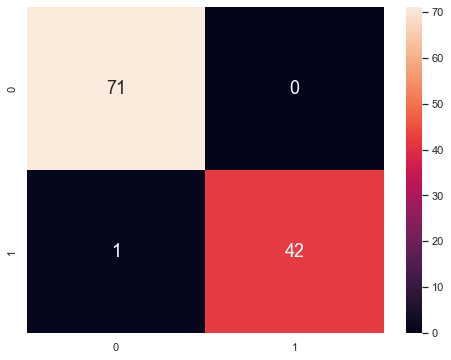

In [74]:
LogisticRegModelPre = LogisticRegression(max_iter=100000, random_state=42)

parameter = {
    "C" : [0.1,1,10,100],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag"],
}

LogisticRegModel = GridSearchCV(LogisticRegModelPre, parameter)
LogisticRegModel.fit(X_train_scaled, Y_train)

Y_train_pred = LogisticRegModel.predict(X_train_scaled)
Y_test_pred = LogisticRegModel.predict(X_test_scaled)

matrix_train = confusion_matrix(Y_train, Y_train_pred)
matrix_test = confusion_matrix(Y_test, Y_test_pred)

f, axes = plt.subplots(figsize=(8, 6))
sb.heatmap(matrix_test, annot = True, fmt=".0f", annot_kws={"size": 18})

print("C value used used:", LogisticRegModel.best_params_['C'])
print("Solver used used:", LogisticRegModel.best_params_['solver'])

print("\nResults for Testing Data:")
print("Accuracy: ", accuracy_score(Y_test, Y_test_pred))
print("Precision: ", precision_score(Y_test, Y_test_pred))
print("Recall: ", recall_score(Y_test, Y_test_pred))
print("F1 Score: ", f1_score(Y_test, Y_test_pred))

## Decision Tree

Depth of tree used: 3

Results for Testing Data:
Accuracy:  0.9473684210526315
Precision:  0.9512195121951219
Recall:  0.9069767441860465
F1 Score:  0.9285714285714286


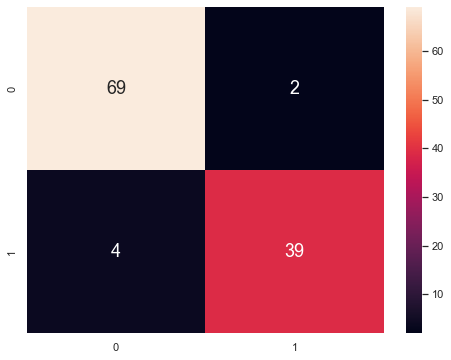

In [75]:
#Using Random Search
DecisionTreeModelPre = DecisionTreeClassifier(random_state=42)

#Check which heigh of tree would be best
parameter = {
    "max_depth" : [1,2,3,4,5,6,7,8,9,10]
}
DecisionTreeModel = RandomizedSearchCV(DecisionTreeModelPre, parameter, random_state=42)
DecisionTreeModel.fit(X_train, Y_train)

Y_train_pred = DecisionTreeModel.predict(X_train)
Y_test_pred = DecisionTreeModel.predict(X_test)

matrix_train = confusion_matrix(Y_train, Y_train_pred)
matrix_test = confusion_matrix(Y_test, Y_test_pred)

f, axes = plt.subplots(figsize=(8, 6))
sb.heatmap(matrix_test, annot = True, fmt=".0f", annot_kws={"size": 18})

print("Depth of tree used:", DecisionTreeModel.best_params_['max_depth'])

print("\nResults for Testing Data:")
print("Accuracy: ", accuracy_score(Y_test, Y_test_pred))
print("Precision: ", precision_score(Y_test, Y_test_pred))
print("Recall: ", recall_score(Y_test, Y_test_pred))
print("F1 Score: ", f1_score(Y_test, Y_test_pred))

## Random Forest

Depth of tree used: 10
Number of trees used: 340

Results for Testing Data:
Accuracy:  0.9649122807017544
Precision:  0.975609756097561
Recall:  0.9302325581395349
F1 Score:  0.9523809523809524


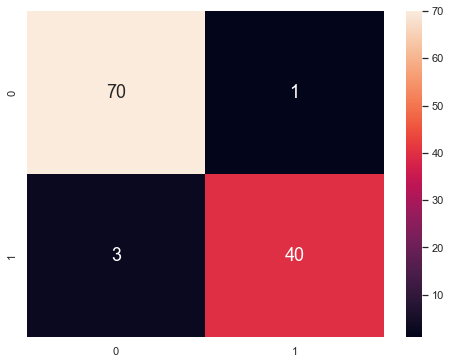

In [76]:
#Using Random Search
RandomForestModelPre = RandomForestClassifier(random_state=42)

#Finding best number of trees and depth of tree
parameter = {
    "n_estimators" : [i for i in range(50,1010,10)],
    "max_depth" : [1,2,3,4,5,6,7,8,9,10]
}

RandomForestModel = RandomizedSearchCV(RandomForestModelPre, parameter, random_state = 42)
RandomForestModel.fit(X_train, Y_train)

Y_train_pred = RandomForestModel.predict(X_train)
Y_test_pred = RandomForestModel.predict(X_test)

matrix_train = confusion_matrix(Y_train, Y_train_pred)
matrix_test = confusion_matrix(Y_test, Y_test_pred)

f, axes = plt.subplots(figsize=(8, 6))
sb.heatmap(matrix_test, annot = True, fmt=".0f", annot_kws={"size": 18})

print("Depth of tree used:", RandomForestModel.best_params_['max_depth'])
print("Number of trees used:", RandomForestModel.best_params_['n_estimators'])

print("\nResults for Testing Data:")
print("Accuracy: ", accuracy_score(Y_test, Y_test_pred))
print("Precision: ", precision_score(Y_test, Y_test_pred))
print("Recall: ", recall_score(Y_test, Y_test_pred))
print("F1 Score: ", f1_score(Y_test, Y_test_pred))


## Support Vector Machine

C value used used: 1
Kernel used used: rbf

Results for Testing Data:
Accuracy:  0.9824561403508771
Precision:  1.0
Recall:  0.9534883720930233
F1 Score:  0.9761904761904763


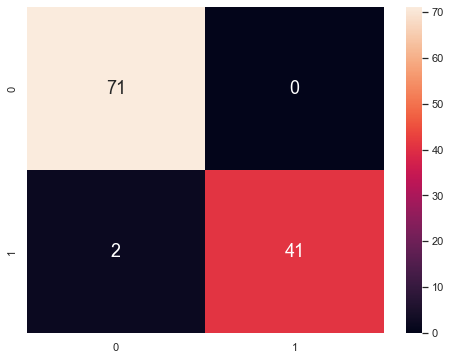

In [77]:
SVMModelPre = SVC(random_state=42)

#Finding optimal hyperparameters
parameter = {
    "C" : [0.1,1,10,100],
    "kernel": ["linear", "poly", "rbf", "sigmoid"]
}

SVMModel = GridSearchCV(SVMModelPre, parameter)
SVMModel.fit(X_train_scaled, Y_train)

Y_train_pred = SVMModel.predict(X_train_scaled)
Y_test_pred = SVMModel.predict(X_test_scaled)

matrix_train = confusion_matrix(Y_train, Y_train_pred)
matrix_test = confusion_matrix(Y_test, Y_test_pred)

f, axes = plt.subplots(figsize=(8, 6))
sb.heatmap(matrix_test, annot = True, fmt=".0f", annot_kws={"size": 18})

print("C value used used:", SVMModel.best_params_['C'])
print("Kernel used used:", SVMModel.best_params_['kernel'])


print("\nResults for Testing Data:")
print("Accuracy: ", accuracy_score(Y_test, Y_test_pred))
print("Precision: ", precision_score(Y_test, Y_test_pred))
print("Recall: ", recall_score(Y_test, Y_test_pred))
print("F1 Score: ", f1_score(Y_test, Y_test_pred))